In [37]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
population = [
124, 151, 102, 189, 160, 145, 120, 132, 135, 159, 114, 175, 171, 124, 154,
177, 152, 120, 144, 121, 113, 163, 186, 196, 183, 105, 130, 149, 130, 123, 
175, 143, 186, 182, 184, 174, 134, 158, 196, 109,
216, 285, 209, 288, 276, 281, 283, 200, 262, 
267, 235, 206, 245, 232, 299, 249, 295, 232, 206, 237,
369,
487, 450, 487,
597, 548,
682,
712, 706, 755, 700, 709, 747, 773, 796, 739, 716, 756, 767, 752, 728, 750,
829, 875, 845, 881, 865, 804, 845, 890, 872, 833, 874, 845, 859, 837, 847, 811, 893, 807
]

In [57]:
dframe = DataFrame(population, columns=['population'])

In [58]:
labels = ["{0} - {1}".format(i, i+100) for i in range(0, 900, 100)]
c = pd.cut(population, np.arange(0,901,100), right=False, labels = labels)

In [59]:
a = dframe.groupby(c).count()
a.rename(columns={'population': 'count'}, inplace=True)

In [60]:
a['class'] = [i for i in range(50, 851, 100)]

In [61]:
total = a['count'].sum()

In [62]:
a['rel freq']  = a['count'] / total
a['acc rel freq'] = a['rel freq'].cumsum()

In [63]:
a['population'] = dframe.groupby(c).sum()

In [64]:
total_pop = a['population'].sum()

In [65]:
a['rel pop'] = a['population'] / total_pop
a['acc rel pop'] = a['rel pop'].cumsum()

In [72]:
a = a.fillna(0)

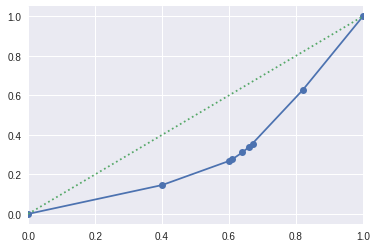

In [73]:
p = plt.subplot()
p.plot(a['acc rel freq'], a['acc rel pop'], marker="o")

ref_x = [float(i/10.0) for i in range(11)]
ref_y = [float(i/10.0) for i in range(11)]

p.plot(ref_x, ref_y, linestyle="dotted")
p.set_xlim([0, 1.0])
plt.show()

In [71]:
a = a.fillna(0)

In [74]:
A = [0,3,3,5,5,5,5,7,7,10]

In [81]:
def gini(data):
    sub = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            sub.append(np.abs(data[i] - data[j]))
    return float(sum(sub)*2) / (2 * (len(data) **2) * np.mean(data))
    

In [114]:
x = np.array(a['acc rel freq'])
y = np.array(a['acc rel pop'])

In [115]:
def gini(x, y):
    area = []
    for i in range(1, len(x)):
        y_plus = y[i-1] + y[i]
        area.append(y_plus * (x[i] - x[i-1]) / 2.0)
    return (0.5 - np.sum(area))*2.0

In [116]:
gini(x, y)

0.37551561090935648